11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


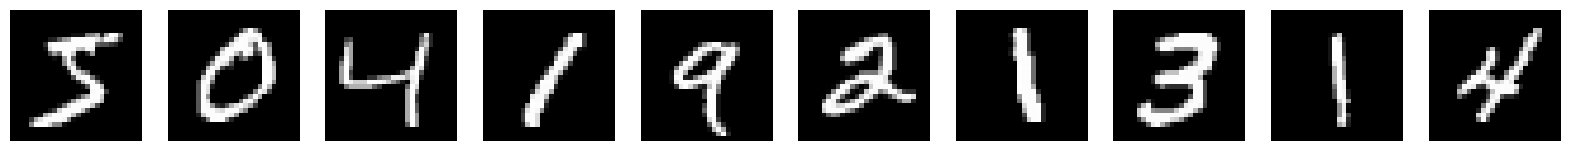

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/11
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7752 - loss: 0.6980 - val_accuracy: 0.9573 - val_loss: 0.1434
Epoch 2/11
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9461 - loss: 0.1815 - val_accuracy: 0.9648 - val_loss: 0.1164
Epoch 3/11
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9554 - loss: 0.1467 - val_accuracy: 0.9707 - val_loss: 0.0990
Epoch 4/11
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9654 - loss: 0.1143 - val_accuracy: 0.9705 - val_loss: 0.1046
Epoch 5/11
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9684 - loss: 0.1032 - val_accuracy: 0.9737 - val_loss: 0.0910
Epoch 6/11
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9729 - loss: 0.0883 - val_accuracy: 0.9742 - val_loss: 0.0904
Epoch 7/11
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9755 - loss: 0.0792 - val_accuracy: 0.9751 - val_loss: 0.0861
Epoch 8/11
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9763 - loss: 0.0734 - val_accurac

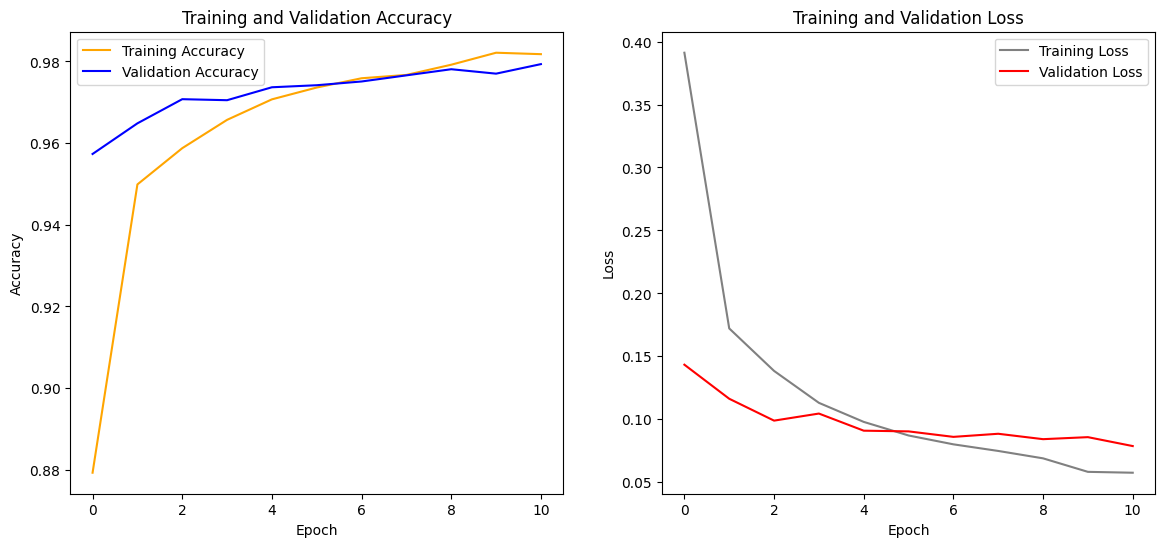

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


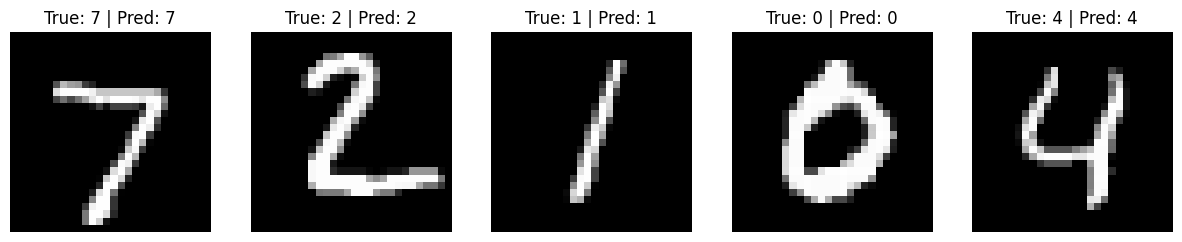

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Set a random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data
x_train = x_train.reshape(-1, 784).astype('float32') / 255
x_test = x_test.reshape(-1, 784).astype('float32') / 255

# Convert labels to categorical (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Visualize some samples from the dataset
fig, axes = plt.subplots(1, 10, figsize=(20, 4))
for i in range(10):
    axes[i].imshow(x_train[i].reshape(28, 28), cmap='gray')
    axes[i].axis('off')
plt.show()

# Define the neural network architecture
model = Sequential([
    Dense(256, input_shape=(784,), activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.1, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model architecture
model.summary()

# Train the model with 11 epochs and visualize performance
history = model.fit(x_train, y_train, epochs=11, batch_size=128, validation_split=0.2)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

# Plot training & validation accuracy and loss
plt.figure(figsize=(14, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='orange')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='blue')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='gray')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Predict on test data
predictions = model.predict(x_test)

# Display some sample predictions
fig, axes = plt.subplots(1, 5, figsize=(15, 4))
for i, ax in enumerate(axes):
    ax.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"True: {np.argmax(y_test[i])} | Pred: {np.argmax(predictions[i])}")
    ax.axis('off')
plt.show()


In [ ]:
1. Libraries and Random Seed
TensorFlow and Keras: These libraries provide tools to build and train neural networks efficiently.
Random Seed: Setting a random seed makes results reproducible. The same seed will lead to the same results if the code is run again.
2. Loading and Preprocessing Data
MNIST Dataset: A standard dataset for digit recognition containing 60,000 training and 10,000 test images, each of size 28x28 pixels.
Normalization: Dividing by 255 scales pixel values to the range [0, 1], which helps the model learn more efficiently.
Flattening: Reshaping 28x28 images into 784-length vectors makes them compatible with the input of a fully connected neural network.
One-Hot Encoding: Converting labels (0-9) into binary arrays. For example, label 3 becomes [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]. This helps the model output probabilities for each digit.
3. Visualizing Data
Matplotlib: Used here to visualize the first few images in the training set to understand what the data looks like before feeding it into the model.
4. Defining the Neural Network Architecture
Sequential Model: The model is a stack of layers, where each layer feeds its output into the next layer. This simple structure works well for straightforward tasks like digit classification.
Dense Layer: A fully connected layer where each neuron is connected to all neurons in the previous layer. It’s the primary building block of this neural network.
Activation Function (ReLU): ReLU (Rectified Linear Unit) introduces non-linearity, allowing the model to learn complex patterns.
Dropout: A technique that randomly “drops” (ignores) some neurons during training to prevent overfitting, where the model would otherwise perform well on training data but poorly on new data.
Softmax: The final layer’s activation function for multi-class classification. Softmax outputs probabilities for each class (0-9), ensuring they sum up to 1.
5. Compiling the Model
Optimizer (SGD): Stochastic Gradient Descent (SGD) with momentum adjusts weights based on errors, gradually improving the model’s predictions. The momentum parameter helps to speed up training by accumulating previous updates' direction.
Learning Rate: Determines the step size at each iteration while moving toward a minimum of the loss function.
Loss Function: Categorical Crossentropy measures how well the predicted probabilities match the true labels, used for multi-class classification.
Metrics: Accuracy shows the fraction of correct predictions.
6. Model Summary
Summary: Displays a model summary including layer types, output shapes, and parameter counts, which helps understand the model’s structure and complexity.
7. Training the Model
Epochs: Each epoch is a full pass over the training data. Here, the model trains for 11 epochs.
Batch Size: The model processes 128 samples at a time before updating weights, balancing memory use and speed.
Validation Split: 20% of training data is set aside to monitor model performance on unseen data during training. This helps gauge generalization.
8. Evaluating the Model
Evaluation: After training, the model’s performance is measured on the test set. Test Loss is the average error on the test data, and Test Accuracy is the percentage of correctly classified images.
9. Visualizing Training Performance
Accuracy and Loss Plots: Plots show training and validation accuracy and loss over epochs, helping to check for overfitting (where training performance improves but validation does not).
10. Making Predictions
Predicting on Test Data: The model generates probability distributions for each test image’s classes.
Displaying Predictions: Showing a few test images along with true labels and predictions provides insight into the model’s performance.